<모델 2가지 이상 사용해보기>

8,124종류의 버섯의 특징과 독이 있는지 적혀 있는 데이터 세트 <br>
버섯의 특징을 기반으로 독의 유무를 판정하기 위한 것입니다.
* 1번째 열 - 독   : p(poisonous), 식용 : e(edible)
* 2번째 열 - 버섯의 머리 모양 : 벨 형태 : b, 원뿔 형태: c, 볼록한 형태 : x, 평평한 형태 : f, 혹형태 : k, 오목한 형태 : s
* 4번째 열 - 버섯의 머리 색 : 갈색 : n, 황갈색 : b, 연한 갈색 : c, 회색 : g, 녹색 : r, 분홍색 : p, 보라색 : u, 붉은색 : e, 흰색 : w, 노란색 : y

- cap-shape, cap-surface, cap-color, bruises?, odor, gill-attachment, gill-spacing, gill-size, gill-color, stalk-shape, stalk-root, stalk-surface-above-ring, stalk-surface-below-ring, stalk-color-above-ring, stalk-color-below-ring, weil-type, veil-color, ring-number, ring-type, spore=print-color, population, habitat

In [61]:
import pandas as pd
import numpy as np

In [62]:
mushrooms = pd.read_csv('../data/mushroom.csv', header=None)
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [63]:
mushrooms.columns = ['poison','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size','gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']
mushrooms.head()

,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### (0) 전처리
- 누락값 확인
- Convert Categorical varables --> string to numeric

In [64]:
# 누락값이 있나요?  아니요!
mushrooms.isnull().sum()

poison                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [65]:
mushrooms = mushrooms.astype('category')
mushrooms.dtypes

poison                      category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [66]:
for variable in mushrooms.columns:
    mushrooms[variable] = mushrooms[variable].cat.codes
mushrooms.head()

,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [67]:
mushrooms.corr()

,poison,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
poison,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [68]:
# 데이터 내의 모든 버섯들은 veil-type이 한가지 'p'이므로 예측 적합한 변수가 아니다.
mushrooms = mushrooms.drop(['veil-type'], axis=1)

In [69]:
from sklearn.model_selection import train_test_split
# dividing dataset into features and target (total row :8124)
features = mushrooms.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(features, mushrooms['poison'], test_size = 0.2, random_state = 42)

### (1) 랜덤 포레스트

In [70]:
# return_train_score = True는 검증 점수 뿐만 아니라 훈련 세트에 대한 점수도 같이
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


In [71]:
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.00518743 0.00733857 0.01579949 0.05230395 0.17899064 0.00279848
 0.03770571 0.13026788 0.12427965 0.01846197 0.05550801 0.03811082
 0.03384387 0.02147421 0.02161543 0.00146064 0.01375371 0.06846216
 0.09298268 0.05367134 0.02598336]


cap-shape : 0.005
cap-surface : 0.007
cap-color : 0.016
bruises : 0.052
odor : 0.179
gill-attachment : 0.003
gill-spacing : 0.038
gill-size : 0.130
gill-color : 0.124
stalk-shape : 0.018
stalk-root : 0.056
stalk-surface-above-ring : 0.038
stalk-surface-below-ring : 0.034
stalk-color-above-ring : 0.021
stalk-color-below-ring : 0.022
veil-color : 0.001
ring-number : 0.014
ring-type : 0.068
spore-print-color : 0.093
population : 0.054
habitat : 0.026


<Axes: >

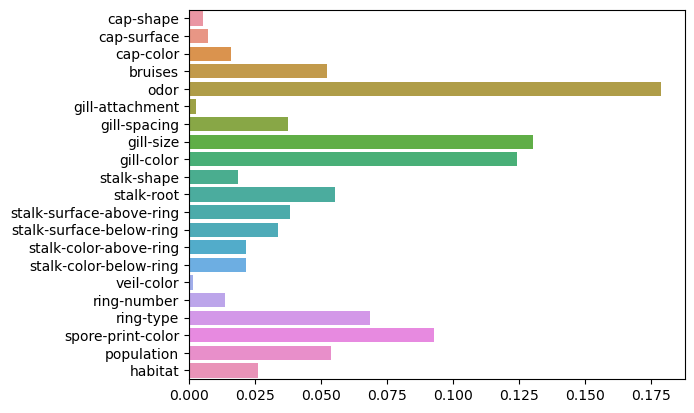

In [72]:
import seaborn as sns
feature_names = mushrooms.columns[1:]
# feature별 importance제공
for name, value in zip(feature_names, rf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))
#feature importance를 column별로 시각화
sns.barplot(x = rf.feature_importances_, y = feature_names)

In [73]:
# out of bag 샘플 (검증 세트의 역할) - oob_score = True
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
print(rf.oob_score_)

1.0


### Lightgbm

In [74]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


### 히스토그램 기반

In [75]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 1.0


In [76]:
# 특성 중요도 : permutation_importance() - importances, importances_mean, importances_std를 담고 있다.
# n_repeats=10 (기본값은 5)
from sklearn.inspection import permutation_importance
hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.         0.         0.         0.         0.38485921 0.
 0.         0.01580243 0.         0.         0.02238806 0.
 0.         0.         0.         0.         0.         0.
 0.0355747  0.00735498 0.        ]


In [77]:
hgb.score(X_test, y_test)

1.0

### SVM

In [78]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [80]:
print('서포트 벡터 머신, 정확도 : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(confusion_mat)

서포트 벡터 머신, 정확도 : 99.38%
[[842   1]
 [  9 773]]


### 결정 트리

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, X_train, y_train, cv = splitter)
print(np.mean(scores['test_score']))

1.0
1.0
1.0


### 그리드 서치

In [84]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

gs = GridSearchCV(SVC(), param_grid, refit=True,verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)

print("최상의 매개변수 조합 : ", gs.best_params_)
print("최상의 교차검증 점수 : ", np.max(gs.cv_results_['mean_test_score']))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
최상의 매개변수 조합 :  {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
최상의 교차검증 점수 :  1.0


In [85]:
svc = gs.best_estimator_
y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

print('서포트 벡터 머신, 정확도 : {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(confusion_mat)

서포트 벡터 머신, 정확도 : 100.00%
[[843   0]
 [  0 782]]
